In [1]:
import pandas as pd

df = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/data/processed/loan_credit_approval_engineered_scale.csv')

df.head()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App
0,-1.257770,-0.571945,0.158569,-1.218923,1.108717,-0.322166,-1.276775,-0.363814,-0.667208,-0.850925,...,False,False,False,False,False,False,False,False,False,False
1,1.154616,-0.571945,-0.260761,1.437802,1.108717,-0.181486,-0.216161,0.767742,0.596113,1.880962,...,False,False,False,False,False,False,False,False,False,False
2,0.617260,1.748420,-0.514455,-0.039143,1.108717,-0.209622,-0.767889,-0.363814,-0.035548,-1.033051,...,False,False,False,False,False,False,False,False,False,True
3,-0.480318,1.748420,1.932333,-0.583062,-0.856708,0.373261,0.756678,0.767742,-0.035548,0.059704,...,False,False,False,False,False,False,False,False,False,False
4,-0.303105,-0.571945,0.043253,-0.143850,-0.575933,-0.617596,-0.828496,-0.363814,-0.193463,-1.215177,...,False,False,False,False,False,False,False,False,False,False


In [2]:
X = df.drop('default', axis = 1)
y = df['default']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,             
    max_depth=20,                 
    min_samples_split=5,          
    min_samples_leaf=2,           
    max_features='sqrt',          
    class_weight='balanced',      
    random_state=42,
    n_jobs=-1
)

In [4]:
rf_model = rf.fit(X_train, y_train)

F1 Score: 0.4245469200685313
ROC-AUC Score: 0.7148779722018884
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78    204097
           1       0.33      0.60      0.42     49260

    accuracy                           0.69    253357
   macro avg       0.60      0.65      0.60    253357
weighted avg       0.77      0.69      0.71    253357



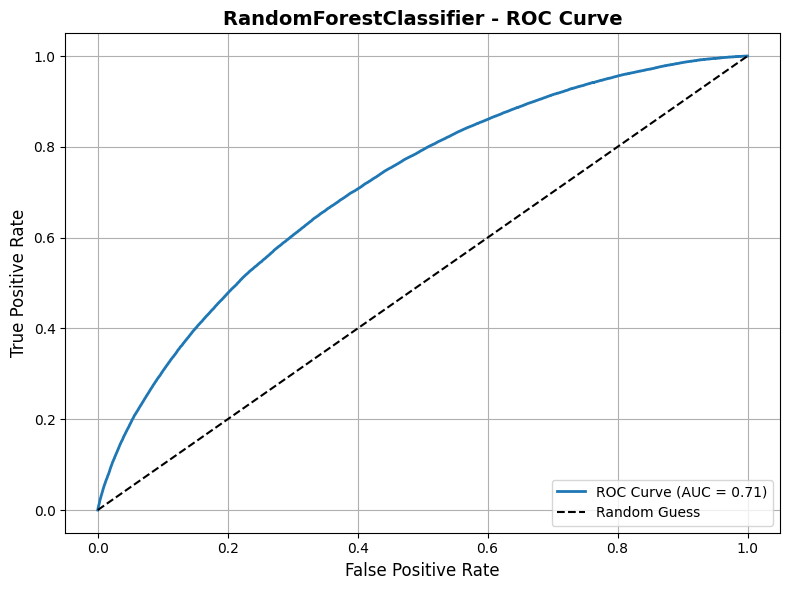

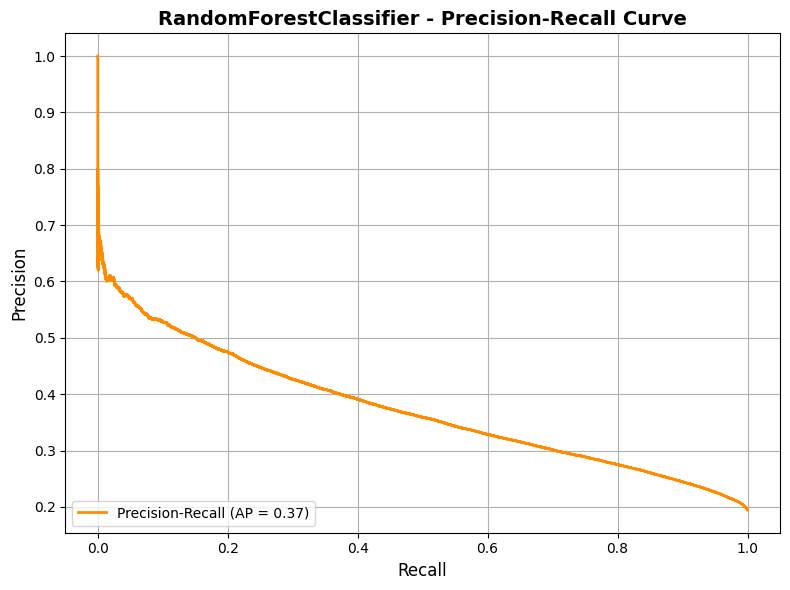

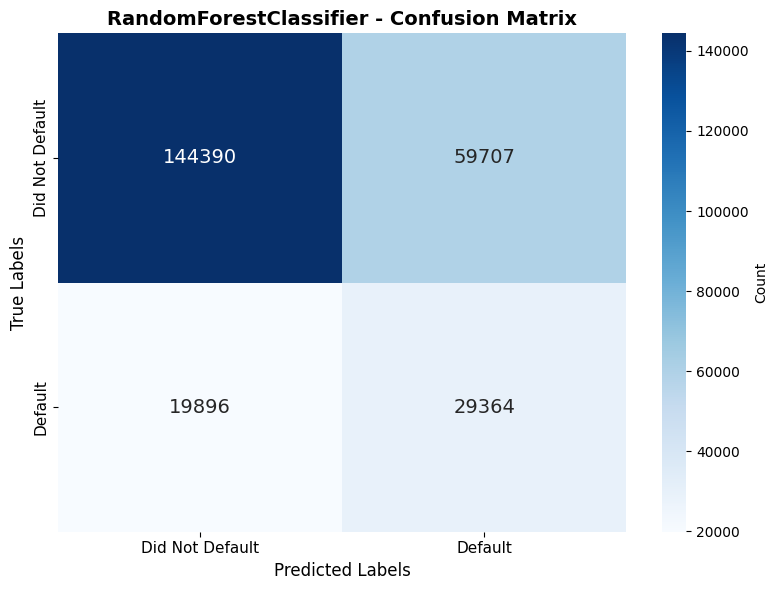

{'f1_score_RandomForestClassifier': 0.4245469200685313,
 'roc_auc_RandomForestClassifier': np.float64(0.7148779722018884),
 'average_precision_RandomForestClassifier': np.float64(0.37376782382964185)}

In [5]:
#evaluate the model

import sys

sys.path.append('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/script')

from metrics_calculation import evaluation

evaluation(rf_model, X_test, y_test, 'RandomForestClassifier')

Based on the evaluation of the Random Forest model for predicting loan default, the results indicate a moderately strong baseline performance for imbalanced binary classification. The ROC Curve shows an AUC of 0.71, suggesting the model has a reasonable ability to distinguish between defaulters and non-defaulters. However, the Precision-Recall Curve with an Average Precision (AP) of 0.37 reflects that precision declines rapidly as recall increases — a common challenge in imbalanced datasets. The confusion matrix reveals that out of 49,260 true defaults, the model correctly identified 29,364 but misclassified 19,896, yielding a recall of 60% and a precision of 33% for the minority class. The relatively high number of false positives (59,707 non-defaulters predicted as default) contributed to the lower precision. Overall, while the model provides decent recall and AUC, its precision needs improvement.

In [6]:
import xgboost as xgb

#count ratio to compute scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, ...)

F1 Score: 0.43096946135286013
ROC-AUC Score: 0.7222643818598901
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75    204097
           1       0.32      0.68      0.43     49260

    accuracy                           0.65    253357
   macro avg       0.60      0.66      0.59    253357
weighted avg       0.78      0.65      0.69    253357



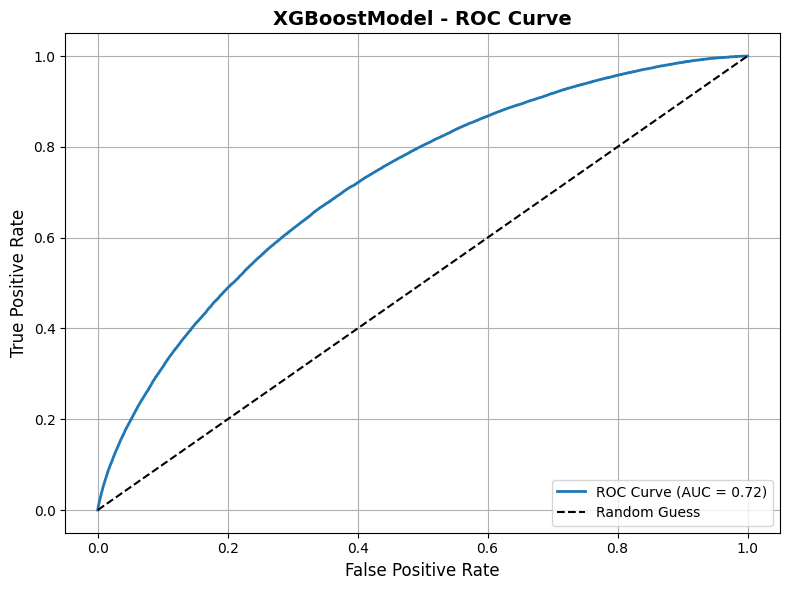

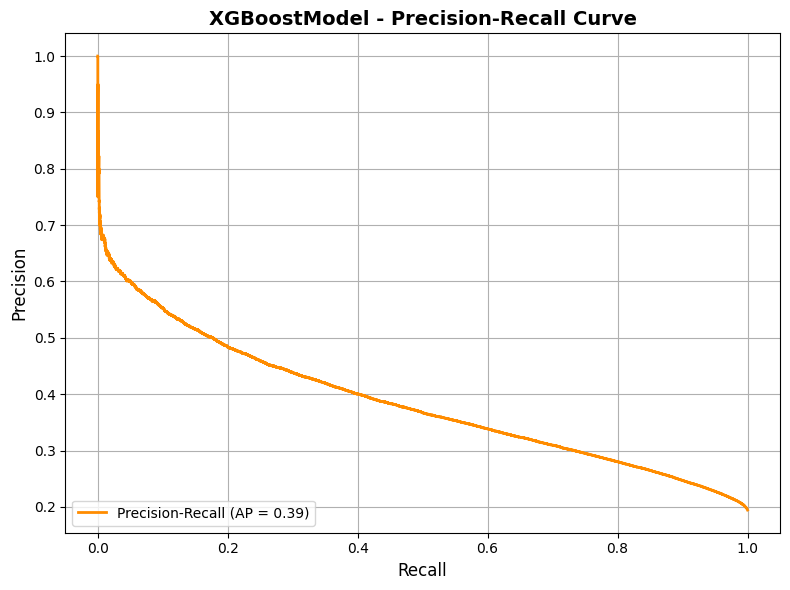

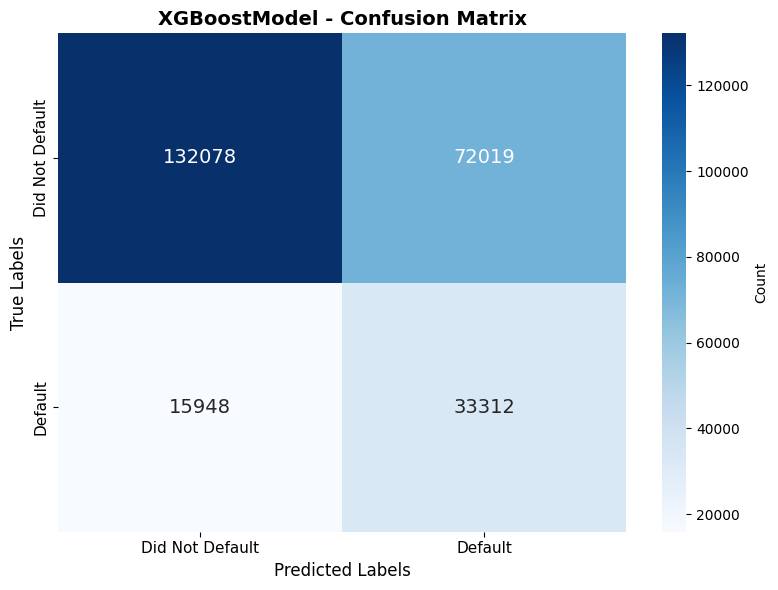

{'f1_score_XGBoostModel': 0.43096946135286013,
 'roc_auc_XGBoostModel': np.float64(0.7222643818598901),
 'average_precision_XGBoostModel': np.float64(0.38508860104013054)}

In [7]:
evaluation(xgb_model, X_test, y_test, 'XGBoostModel')

The initial XGBoost model demonstrates moderate predictive capability in identifying loan defaults. The ROC-AUC score of 0.72 suggests the model performs better than random classification and is reasonably effective at ranking borrowers by risk. However, the average precision score (AP) of 0.39 from the precision-recall curve indicates limited precision, which is especially critical given the class imbalance typical in default prediction problems. The confusion matrix reveals that while the model correctly classified 33,312 defaults, it also misclassified 15,948 actual defaults as non-defaults—a key area for improvement. Additionally, the model falsely labeled 72,019 non-defaulters as defaulters, which may lead to rejecting creditworthy applicants. These results are better than previous model, however, it is still very average and needs more improvement.

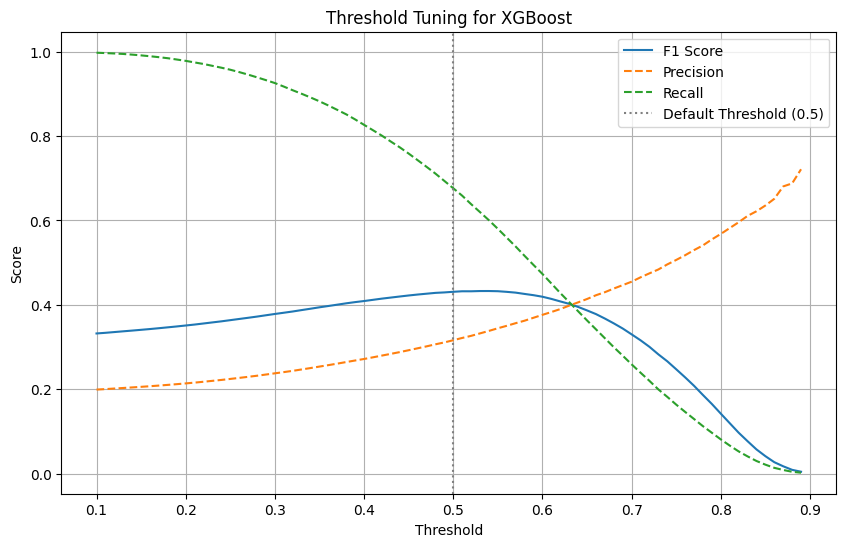

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

#predict probabilities for class 1 (default)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

#store scores
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []
precision_scores = []
recall_scores = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))
    precision_scores.append(precision_score(y_test, y_pred_t))
    recall_scores.append(recall_score(y_test, y_pred_t))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision', linestyle='--')
plt.plot(thresholds, recall_scores, label='Recall', linestyle='--')
plt.axvline(0.5, color='gray', linestyle=':', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for XGBoost')
plt.legend()
plt.grid(True)
plt.show()


After evaluating the XGBoost model’s performance across varying classification thresholds, it becomes evident that the default threshold of 0.5 does not yield the best balance between precision and recall. The threshold tuning plot shows that the F1 score peaks slightly above 0.5, indicating a better tradeoff between false positives and false negatives in that region. Lowering the threshold below 0.5 significantly increases recall (ability to catch defaulters) but at the expense of precision (leading to more false alarms), while increasing it improves precision but sharply decreases recall. By selecting the threshold that maximizes the F1 score—typically a preferred metric for imbalanced classification tasks like loan default prediction—the model achieves a more optimal balance, reducing the cost of misclassification for both classes. This tuning step refines the model’s decision boundary and is crucial for aligning model performance with business risk preferences.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

threshold = 0.62  # replace with your optimal value(
y_pred = (y_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.3900418007620316
Recall: 0.42809581810799835
F1 Score: 0.40818380659272596

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85    204097
           1       0.39      0.43      0.41     49260

    accuracy                           0.76    253357
   macro avg       0.62      0.63      0.63    253357
weighted avg       0.77      0.76      0.76    253357



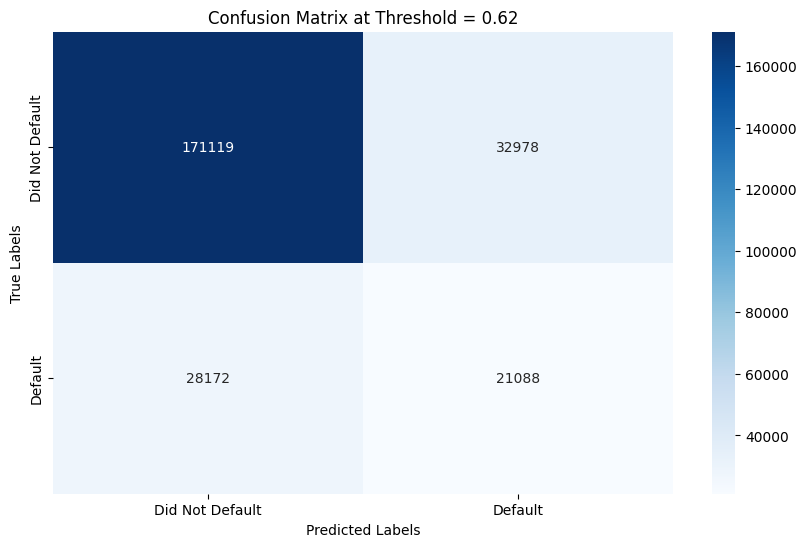

In [14]:
import seaborn as sns

plt.figure(figsize = (10,6))

sns.heatmap(data = cm, annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels=['Did Not Default', 'Default'],
            yticklabels=['Did Not Default', 'Default'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix at Threshold = {threshold}')

plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/figures/confusion_matrix_threshold_0.62.png')

plt.show()




After tuning the classification threshold to optimize the F1 score, the XGBoost model showed improved balance between precision and recall. At the new threshold, the model achieved a precision of 39.0%, recall of 42.8%, and an F1 score of 40.8% for the positive (default) class. Compared to the baseline threshold, this represents a more equitable tradeoff between capturing defaulters and limiting false positives. The updated confusion matrix reflects these improvements, with better identification of defaults while maintaining high precision for non-default predictions (86% precision and 85% F1 for class 0). Overall, the model’s macro F1 score increased to 0.63, and the overall accuracy stood at 76%, validating the benefit of threshold tuning in this imbalanced classification setting.